In [1]:
import numpy as np

def parse_positions( pos_fname, scell=(1,1,1) ):
    data = None
    with open(pos_fname) as f:
        data = f.read()
        for c in [ ")", "(", "[", "]", ",", "\'" ]:
            data = data.replace(c,"")
    data = np.array([ (*elem.split()[1:3],0.0) for elem in data.split("\n") ], dtype=float)    
    return data


def get_neighbor_list(tree, points, cutoff_radius):
    
    # Get all neighbors for a given cutoff the tree for points within the cutoff distance
    neighbors_list = tree.query_ball_point(points, cutoff_radius)

    # Determine maximum number of neighbors 
    max_neighbors_number = max(len(neighbors) for neighbors in neighbors_list)

    # Create a structured numpy array to load the neighbor list 
    # if the number of neighbors for a ith-entry is less than the maximum
    #fill with -1, else use correct values
    result = np.full((len(neighbors_list), max_neighbors_number), -1)
    for i, neighbors in enumerate(neighbors_list):
        result[i, :len(neighbors)] = neighbors
    
    return result



In [2]:
import numpy as np
from scipy.spatial import KDTree

points = parse_positions("pos.txt")
center = np.mean(points, axis=0);
points-=center
cutoff_radius = 3

# Construct a KDTree
tree = KDTree(points)

neighbors_list = get_neighbor_list(tree, points, cutoff_radius)

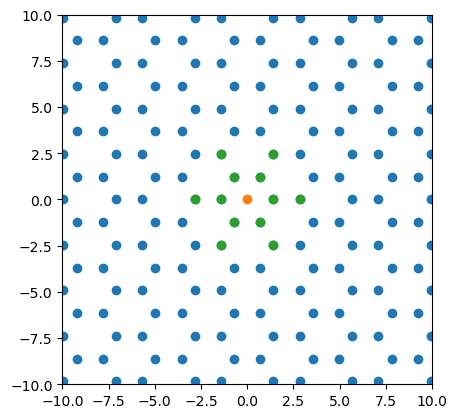

In [3]:
import matplotlib.pyplot as plt
plt.scatter(*(points.T)[:2])
plt.scatter(0,0)

#Test the neighbor list approach
neighbors = get_neighbor_list(tree, [[0,0,0]], cutoff_radius)
plt.scatter(*points[neighbors][0].T[:2])


#plt.scatter(*(neighbors.T)[:2])


plt.xlim(-10,10)
plt.ylim(-10,10)
plt.gca().set_aspect('equal')

# Hopping function

In [4]:
def hopping_function( position, site_i,site_j, model_params):
    p = model_params
    
    delta_r = np.linalg.norm(position[site_i]-position[site_j])
    if delta_r < p["a_nn"]:
        return p["t"]
    return 0.0

model_params = {"t":2.8, "a_nn":1.46}


# Create Hamiltonian Matrix

In [5]:
hopping_list = np.full(neighbors_list.shape,0.0).astype(complex)

with open("ham_new.txt", "w") as f:
    ham = ""

    for site_i, neighbors in enumerate(neighbors_list):
        for n,site_j in enumerate(neighbors):
            if site_j >=0:
                hop_ij = hopping_function(points, site_i, site_j, model_params )
                if np.abs(hop_ij)>0:
                    hopping_list[site_i,n] = hop_ij
                    ham+= "{} {} {} {} \n".format(site_i,site_j, hop_ij.real,hop_ij.imag)
    f.write(ham)

# Write the Hamiltonian File

In [6]:
#with open("ham_new.txt", "w") as f:
 #   ham = ""
  #  for site_i, neighbors_hops in enumerate(zip(neighbors_list,hopping_list) ):
   #     for site_j,hop_ij  in zip(*neighbors_hops):
    #        if site_j>=0 and np.abs(hop_ij)>0: 
                ham+= "{} {} {} {} \n".format(site_i,site_j, hop_ij.real,hop_ij.imag)
    #f.write(ham)

IndentationError: unexpected indent (3215710627.py, line 6)

#### 